In [83]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

In [84]:

train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [85]:
# X (görüntü verisi) ve y (etiketler) ayırma
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

In [86]:
scaler = MinMaxScaler()
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [87]:
print(scaler_X_train.shape)
print(scaler_X_test.shape)

(60000, 784)
(10000, 784)


In [88]:
# Etiketlerin benzersiz değerlerini kontrol etme
unique_labels = np.unique(y_train)
print(unique_labels)


[0 1 2 3 4 5 6 7 8 9]


In [89]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [91]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [92]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [93]:
model = Sequential()

In [94]:
from tensorflow.keras.layers import  Flatten

In [95]:
# İlk gizli katman
model.add(Dense(128, activation='relu', input_shape=(784,)))  # 28x28 = 784

C:\Users\hdgn5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
model.add(Dense(128, activation="relu"))  # İlk gizli katman
model.add(Dense(128, activation="relu"))  # İkinci gizli katman
model.add(Dense(128, activation="relu"))  # Üçüncü gizli katman


In [97]:
model.add(Dense(10,activation="softmax"))

In [98]:
model.compile(optimizer="adam" , loss="categorical_crossentropy" , metrics=["accuracy"])

In [99]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,306 (591.04 KB)

 Trainable params: 151,306 (591.04 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7496 - loss: 0.6881 - val_accuracy: 0.8546 - val_loss: 0.4086
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8544 - loss: 0.3962 - val_accuracy: 0.8468 - val_loss: 0.4142
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8705 - loss: 0.3546 - val_accuracy: 0.8616 - val_loss: 0.3862
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8793 - loss: 0.3273 - val_accuracy: 0.8648 - val_loss: 0.3623
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8884 - loss: 0.3033 - val_accuracy: 0.8659 - val_loss: 0.3667
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8932 - loss: 0.2891 - val_accuracy: 0.8816 - val_loss: 0.3337
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8932 - loss: 0.2822 - val_accuracy: 0.8741 - val_loss: 0.3740
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8999 - loss: 0.2647 - 

In [101]:
pred = model.predict(scaler_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [102]:
# Model tahminlerini yapalım

predicted_classes = np.argmax(pred, axis=1)

# Gerçek etiketler
true_classes = np.argmax(y_test, axis=1)

# Karışıklık matrisi ve raporunu yazdıralım
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.97      0.98      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.88      0.93      0.91      1000
           4       0.76      0.86      0.81      1000
           5       0.97      0.93      0.95      1000
           6       0.77      0.61      0.68      1000
           7       0.92      0.95      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.96      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

Confusion Matrix:
[[841   4  13  38   2   3  95   0   4   0]
 [  1 984   1  12   0   1   1   0   0   0]
 [ 14   1 802  17 122   0  43   0   1   0]
 [ 16  11   5 931  24   0  12   0   1   0]
 [  1   2  89  23 862   0  2

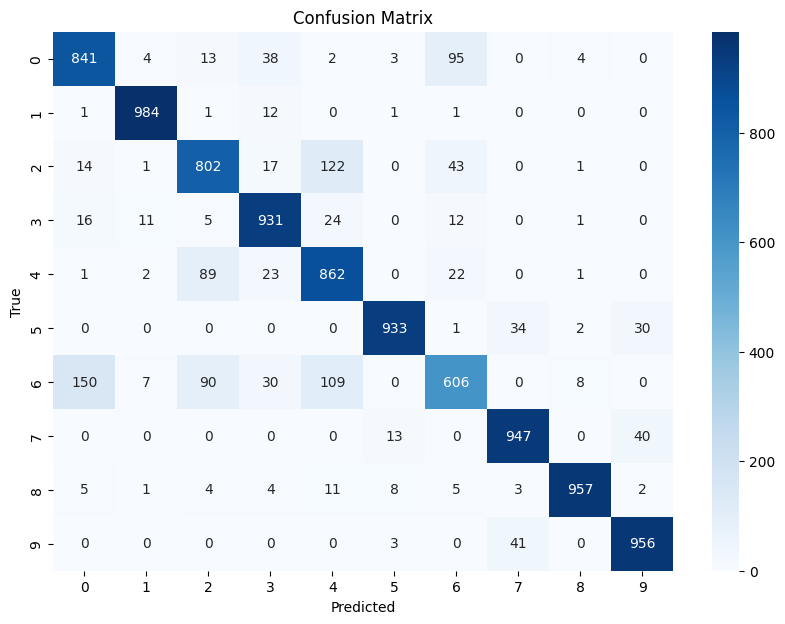

In [103]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


* Scaler kullanmak genellikle mantıklıdır, özellikle sinir ağları gibi derin öğrenme modellerinde, çünkü bu tür modeller öğrenme hızını ve doğruluğu artırabilir.

* Ancak görüntü verisi gibi spesifik verilerde, bazen doğrudan normalize etmek (0 ile 1 arasına çekmek) yeterli olabilir ve scaler kullanmaya gerek olmayabilir.

* Bu durumda fashion-mnist gibi bir datasetle çalışıyorsanız, scaler kullanmak çok da kritik değil, ancak test ve eğitim verisinin aynı şekilde ölçeklendirilmesi gerektiğini unutmamalısınız.

# BAŞTAN TEKRAR DENEYİP MODELİ ÖLÇELİM

* Açıklamalarla alakalı bölümü aşağıda bulabilirsiniz

In [104]:
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

* Bu adımda, veriyi özellikler (features) ve etiketler (labels) olarak ayırıyoruz. Yani, modelin eğitileceği görüntü verisi (X) ile, o görüntülerin ait olduğu etiket (y) bilgilerini ayırıyoruz.

In [105]:
X_train= train_data.drop(columns=["label"]).values
y_train = train_data['label'].values

In [106]:
X_test = test_data.drop(columns=['label']).values
y_test = test_data['label'].values

#### train_data.drop(columns=['label']).values: 

* Bu, eğitim verisinde etiket (label) sütununu çıkararak özellikleri (görüntülerin piksellerini) elde eder. Yani, train_data veri setindeki her satır, bir görüntüyü (28x28 piksellik bir vektörü) temsil eder. Bu, modelin tahmin yapabilmesi için gereken veri setini oluşturur.

* Aynı işlem X_test için de yapılır.

#### train_data['label'].values: 

* Bu, her görüntünün etiketini (yani, görüntüye ait doğru sınıfı, örneğin "t-shirt", "pantolon" vb.) alır. Bu etiketler, modelin öğrenmesi gereken doğru sonuçlardır. Bu etiketleri kullanarak model, doğru tahminlerde bulunmayı öğrenir.
Aynı işlem y_test için de yapılır.

#### train_data ve test_data:

* train_data, modelin eğitileceği eğitim veri setidir.
* test_data, modelin performansının değerlendirileceği test veri setidir.

## Görüntüyü Ölçekleyelim

* Resim verisi olduğundan yalnıcza 255 e bölmek yeterli. Scaler işlemlerine gerek yok

In [107]:
X_train = X_train / 255.0
X_test = X_test / 255.0


* Shapelere bakalım

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(60000, 784)
(10000, 784)
(60000,)
(10000,)


(60000, 784) → 60.000 adet eğitim verisi, her biri 784 özellik (28x28 piksellik görüntü düzleştirilmiş).

(10000, 784) → 10.000 adet test verisi, her biri 784 özellik.

(60000,) → 60.000 adet sınıf etiketi (0-9 arasında).

(10000,) → 10.000 adet sınıf etiketi (0-9 arasında).

### Etiketleri One-Hot Encoding Yapalım !
* Etiketler şu an (60000,) ve (10000,) şeklinde. Bunları one-hot encoding formatına çevirmeliyiz:

In [109]:
from tensorflow.keras.utils import to_categorical

In [110]:
y_train=to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test , num_classes=10)

In [111]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


# MODEL OLUŞTURMAYA GEÇİŞ YAPALIM

In [112]:
model_ann = Sequential()

In [113]:
model_ann.add(Dense(512 , activation="relu")) # İnput

In [114]:
model_ann.add(Dense(512 , activation="relu")) # Hidden
model_ann.add(Dropout(0.3))  # Dropout katmanı eklemek

model_ann.add(Dense(256 , activation="relu")) # Hidden
model_ann.add(Dropout(0.1))  # Dropout katmanı eklemek


model_ann.add(Dense(128 , activation="relu")) # Hidden

In [115]:
model_ann.add(Dense(10,activation="softmax"))# Output

# COMPİLE BÖLÜMÜ

🔹 Çok Sınıflı Sınıflandırma için (10 sınıf)

✅ categorical_crossentropy

Eğer etiketleri one-hot encoding formatına çevirdiysek (to_categorical() kullandıysak) bunu kullanmalıyız

In [116]:
model_ann.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


### Neden Diğer Loss Fonksiyonları Uygun Değil?

* binary_crossentropy	İkili sınıflandırma (0 ve 1) için kullanılır. Fashion-MNIST'te 10 sınıf olduğu için uygun değil.

* mean_squared_error (MSE)	Regresyon problemleri için uygundur, ama sınıflandırmada olasılık farklarını iyi öğrenemez.

* hinge	SVM tabanlı sınıflandırmalarda kullanılır. Softmax yerine SVM Loss gibi çalışan yöntemlerde tercih edilir.

### Categorical Crossentropy: Etiketler one-hot encoded (vektör formatında) olmalıdır.
### Sparse Categorical Crossentropy: Etiketler sparse (tek bir sayısal değer) formatında olmalıdır.

In [117]:
model_ann.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# EĞİTMEDEN ÖNCE İNCELEYELİM

* X_train	Modelin eğitileceği giriş verisi (Feature Matrix).

* y_train	Modelin öğrenmesi gereken çıktı/etiket (Labels).

* epochs=25	Kaç kez tüm veri setiyle eğitim yapılacağını belirler. 1 epoch = tüm veri üzerinden 1 kez geçilmesi.

* batch_size=32	Model her seferinde 32 veri alarak güncelleme yapar. Küçük batch'ler, daha sık güncelleme yapar ama daha yavaş olabilir.

* validation_split=0.3	Eğitim verisinin %30’unu validasyon (doğrulama) için ayırır. Model bu kısımla test edilerek aşırı öğrenme (overfitting) engellenir.

In [118]:
fit =model_ann.fit(X_train,y_train , epochs=12 , batch_size=32 )

Epoch 1/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7606 - loss: 0.6589
Epoch 2/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8545 - loss: 0.4012
Epoch 3/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8698 - loss: 0.3555
Epoch 4/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8791 - loss: 0.3318
Epoch 5/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8891 - loss: 0.3080
Epoch 6/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8915 - loss: 0.2944
Epoch 7/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8981 - loss: 0.2777
Epoch 8/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9025 - loss: 0.2701
Epoch 9/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9030 - loss: 0.2644
Epoch 10/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9062 - loss: 0.2565
Epoch 11/12
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9058 - loss: 0.2511
Epoch 12/12
1875/18

# TEST ETME AŞAMASI

In [119]:
pred = model_ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


* 2. Tahminlerin Sınıf Etiketlerine Çevrilmesi

In [120]:
predicted_classes_2= np.argmax(pred , axis=1)

* 3. Gerçek Etiketlerle Karşılaştırma

In [121]:
true_classes = np.argmax(y_test, axis=1)


* Minik Bir görselleştirme

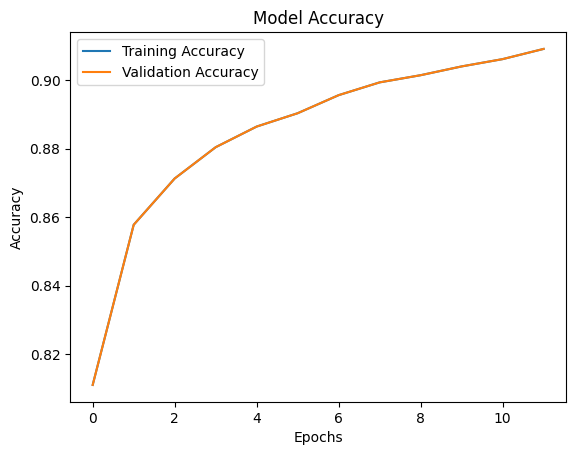

In [125]:
# Doğruluk grafiği
plt.plot(fit.history['accuracy'], label='Training Accuracy')
plt.plot(fit.history['accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#  Model Performansını Değerlendirme


In [122]:
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(true_classes, predicted_classes_2))

print("Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes_2))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1000
           1       0.97      0.99      0.98      1000
           2       0.85      0.79      0.82      1000
           3       0.90      0.91      0.90      1000
           4       0.77      0.91      0.83      1000
           5       0.98      0.94      0.96      1000
           6       0.83      0.56      0.67      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Confusion Matrix:
[[916   2   8  25   1   1  40   0   7   0]
 [  3 992   0   4   1   0   0   0   0   0]
 [ 18   0 793  17 124   0  45   0   3   0]
 [ 24  16   2 905  47   1   5   0   0   0]
 [  0   1  49  18 912   1  1

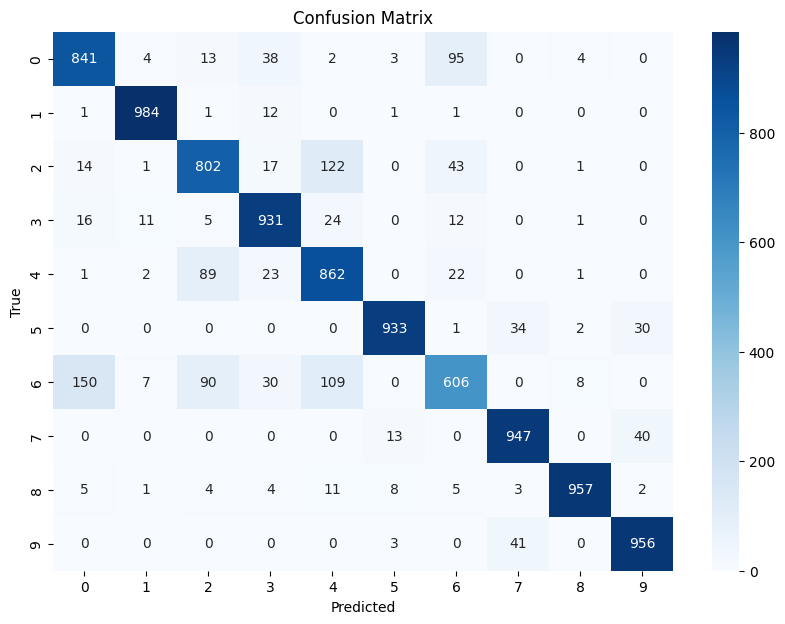

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(true_classes, predicted_classes), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# GÖRSELLEŞTİRMELER

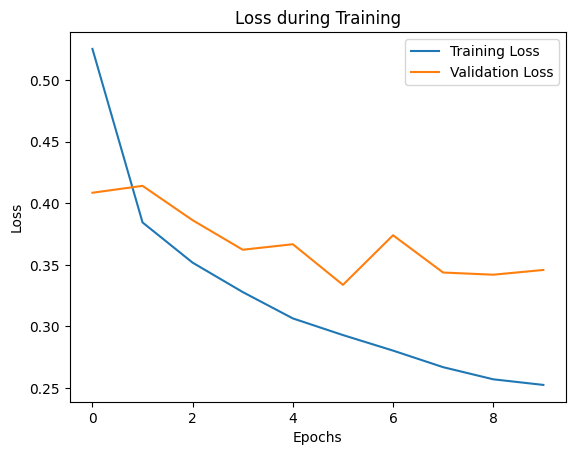

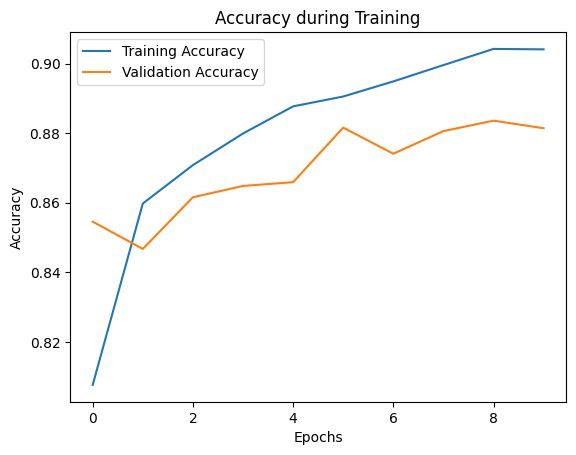

In [133]:


# Kayıp grafiği
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Doğruluk grafiği
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


* İlk Dense katmanının ağırlıklarını al

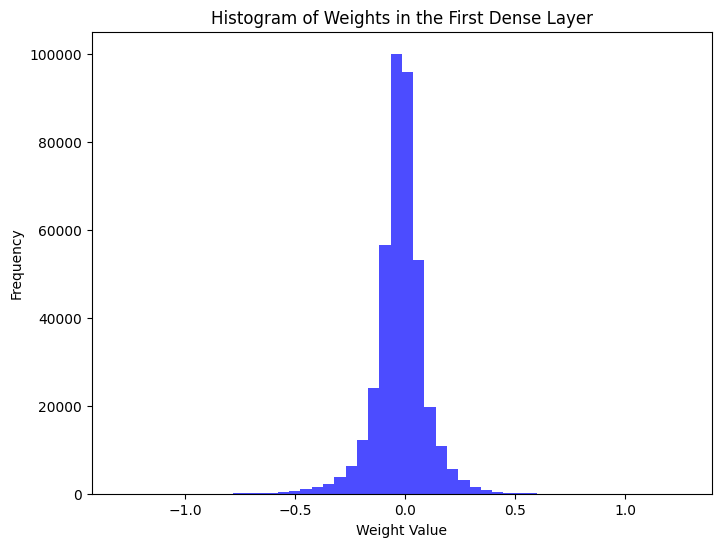

In [151]:
# İlk Dense katmanındaki ağırlıkların histogramını çizelim
weights = model_ann.layers[0].get_weights()[0]

plt.figure(figsize=(8, 6))
plt.hist(weights.flatten(), bins=50, color='blue', alpha=0.7)
plt.title("Histogram of Weights in the First Dense Layer")
plt.xlabel("Weight Value")
plt.ylabel("Frequency")
plt.show()
